In [1]:
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jonghyunlee1993","key":"b30368cf87d529e0f2c5089d8712df1d"}'}

In [2]:
ls -1ha kaggle.json

kaggle.json


In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Permission Warning 이 일어나지 않도록 
!chmod 600 ~/.kaggle/kaggle.json
# 본인이 참가한 모든 대회 보기 
!kaggle competitions list

ref                                               deadline             category            reward  teamCount  userHasEntered  
------------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
digit-recognizer                                  2030-01-01 00:00:00  Getting Started  Knowledge       2385           False  
titanic                                           2030-01-01 00:00:00  Getting Started  Knowledge      18240            True  
house-prices-advanced-regression-techniques       2030-01-01 00:00:00  Getting Started  Knowledge       4518           False  
connectx                                          2030-01-01 00:00:00  Getting Started  Knowledge        313           False  
nlp-getting-started                               2030-01-01 00:00:00  Getting Started      Kudos       2762           False  
competitive-data-science-predict-future-sales     2020-12-31 23:59:00  Playground           Kudos       6299   

In [4]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia
!ls

100% 2.29G/2.29G [00:37<00:00, 51.0MB/s]
100% 2.29G/2.29G [00:37<00:00, 65.9MB/s]
chest-xray-pneumonia.zip  kaggle.json  sample_data


In [5]:
!unzip chest-xray-pneumonia.zip
!ls

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0448-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0449-0001.jpeg  
  inflating: ches

In [0]:
import os
import glob
import numpy as np

data_path = 'chest_xray' 

train_data_path = os.path.join(data_path, 'train')
test_data_path = os.path.join(data_path, 'test')
val_data_path = os.path.join(data_path, 'val')

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

CLASS_NAMES = ['NORMAL', 'PNEUMONIA']

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    validation_split=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=10,
    )

train_generator = train_datagen.flow_from_directory(
    train_data_path,
    target_size=(224, 224),
    batch_size=32,
    shuffle=True,
    class_mode='binary',
    subset='training'
  )

validation_generator = train_datagen.flow_from_directory(train_data_path, 
                                                         target_size=(224, 224), 
                                                         batch_size=32,  
                                                         class_mode='binary',
                                                         classes=CLASS_NAMES,
                                                         subset='validation')

Found 4173 images belonging to 2 classes.
Found 1043 images belonging to 2 classes.


In [8]:
train_generator[5][0][0].shape

(224, 224, 3)

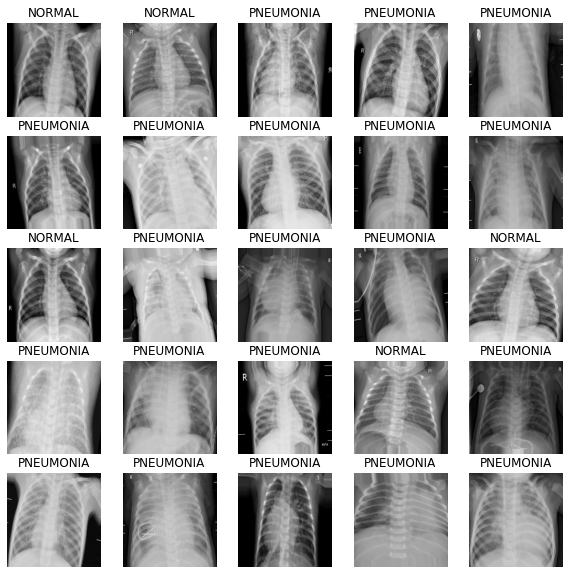

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      plt.title(CLASS_NAMES[int(label_batch[n])])
      plt.axis('off')
        
image_batch, label_batch = validation_generator[6]
show_batch(image_batch, label_batch)

In [10]:
# AlexNet

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(filters=96, input_shape=(224, 224, 3), kernel_size=(11, 11), strides=4, padding='same'))
model.add(Activation('relu'))

model.add(Conv2D(filters=256, kernel_size=(5, 5), strides=2, padding='same'))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(3, 3), strides=2))

model.add(Conv2D(filters=384, kernel_size=(3, 3), strides=1, padding='same'))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(3, 3), strides=2))

model.add(Conv2D(filters=384, kernel_size=(3, 3), strides=1, padding='same'))
model.add(Activation('relu'))

model.add(Conv2D(filters=256, kernel_size=(3, 3), strides=1, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=2))

model.add(Flatten())

model.add(Dense(4096))
model.add(Activation('relu'))
model.add(Dropout(0.4))

model.add(Dense(4096))
model.add(Activation('relu'))
model.add(Dropout(0.4))

model.add(Dense(1000))
model.add(Activation('relu'))
model.add(Dropout(0.4))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 56, 56, 96)        34944     
_________________________________________________________________
activation (Activation)      (None, 56, 56, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 256)       614656    
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 256)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 384)       885120    
_________________________________________________________________
activation_2 (Activation)    (None, 13, 13, 384)       0

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [18]:
IDG_test = ImageDataGenerator(rescale = 1. / 255)

test_data = IDG_test.flow_from_directory(test_data_path, 
                                         target_size=(224, 224),
                                         shuffle=False,
                                         batch_size=32,
                                         class_mode='binary',
                                         classes = CLASS_NAMES)

Found 624 images belonging to 2 classes.


In [15]:
training_history = model.fit_generator(
    epochs=15,
    generator=train_generator,
    steps_per_epoch=train_generator.samples // 32,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32,
   )

Epoch 1/15
130/130 [==============================] - 95s 734ms/step - loss: 0.4676 - accuracy: 0.7713 - val_loss: 0.5642 - val_accuracy: 0.6797
Epoch 2/15
130/130 [==============================] - 95s 732ms/step - loss: 0.5035 - accuracy: 0.7950 - val_loss: 0.4820 - val_accuracy: 0.7197
Epoch 3/15
130/130 [==============================] - 95s 730ms/step - loss: 0.4075 - accuracy: 0.8194 - val_loss: 0.4295 - val_accuracy: 0.7900
Epoch 4/15
130/130 [==============================] - 93s 719ms/step - loss: 0.4303 - accuracy: 0.8162 - val_loss: 0.3958 - val_accuracy: 0.7988
Epoch 5/15
130/130 [==============================] - 93s 712ms/step - loss: 0.3520 - accuracy: 0.8553 - val_loss: 0.3633 - val_accuracy: 0.8506
Epoch 6/15
130/130 [==============================] - 93s 718ms/step - loss: 0.3100 - accuracy: 0.8640 - val_loss: 0.3753 - val_accuracy: 0.8467
Epoch 7/15
130/130 [==============================] - 95s 728ms/step - loss: 0.2949 - accuracy: 0.8742 - val_loss: 0.3336 - val_ac

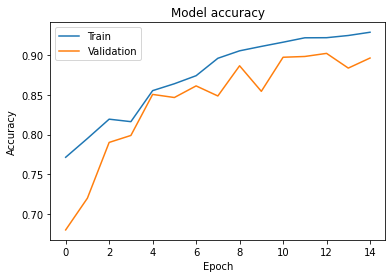

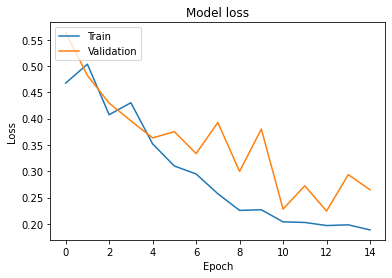

In [16]:
plt.plot(training_history.history['accuracy'])
plt.plot(training_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [21]:
print(model.metrics_names)
scores = model.evaluate_generator(test_data, steps=5)

print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

['loss', 'accuracy']
accuracy: 95.63%
